# Basic Convolutional Network 

Classify cat and dog images with a CNN with 4 layers of convolutional base, plus 2 Dense layers on top. The model will be trained from scratch on a dataset from Kaggle. Only 4000 data will be used to simulate a small dataset.

Thereafter, using the same architecture, we will use data augmentation to improve the results.
 

#### 1.   Preprocessing

Download the images from Kaggle's [Dogs Vs Cats Competition](https://www.kaggle.com/c/dogs-vs-cats/data) and prepare the files into various directories.

In [1]:
import os, shutil

In [2]:
source_origin = './Source/train'

In [3]:
small_dataset = './Source/small_dataset'

In [4]:
os.mkdir(small_dataset)

In [5]:
training_set = os.path.join(small_dataset, "training_set")
os.mkdir(training_set)

In [6]:
validation_set = os.path.join(small_dataset, "validation_set")
os.mkdir(validation_set)

In [7]:
test_set = os.path.join(small_dataset, "test_set")
os.mkdir(test_set)

In [8]:
training_set_cats = os.path.join(training_set, 'cats')
os.mkdir(training_set_cats)

In [9]:
training_set_dogs = os.path.join(training_set, "dogs")
os.mkdir(training_set_dogs)

In [10]:
validation_set_cats = os.path.join(validation_set, "cats")
os.mkdir(validation_set_cats)

In [11]:
validation_set_dogs = os.path.join(validation_set, "dogs")
os.mkdir(validation_set_dogs)

In [12]:
test_set_cats = os.path.join(test_set, "cats")
os.mkdir(test_set_cats)

In [13]:
test_set_dogs = os.path.join(test_set, "dogs")
os.mkdir(test_set_dogs)

Copy the first 1000 cat images and first 1000 dog images into the training folder. This 2000 images will be used for training.

In [21]:
cats_file_names = ["cat.{}.jpg".format(file) for file in range(1000)]

In [26]:
for file in cats_file_names:
    source = os.path.join(source_origin, file)
    destination = os.path.join(training_set_cats, file)
    shutil.copy(source, destination)

In [31]:
dogs_file_names =["dog.{}.jpg".format(file) for file in range(1000)]
for file in dogs_file_names:
    source = os.path.join(source_origin, file)
    destination = os.path.join(training_set_dogs, file)
    shutil.copy(source, destination)

The next 500 cat images and 500 dog images will be copied to the validation folder. These 1000 images will be used for cross validation.

In [33]:
cats_file_names = ["cat.{}.jpg".format(file) for file in range(1000,1500)]
for file in cats_file_names:
    source = os.path.join(source_origin, file)
    destination = os.path.join(validation_set_cats, file)
    shutil.copy(source, destination)

In [35]:
dog_file_name = ["dog.{}.jpg".format(file) for file in range(1000,1500)]
for file in dog_file_name:
    source = os.path.join(source_origin, file)
    destination = os.path.join(validation_set_dogs, file)
    shutil.copy(source, destination)

The final 500 cat images and 500 dog images will be copied to the test folder. These 1000 images will be used for testing.

In [38]:
cats_file_name = ["cat.{}.jpg".format(file) for file in range(1500,2000)]
for file in cats_file_name:
    source = os.path.join(source_origin, file)
    destination = os.path.join(test_set_cats, file)
    shutil.copy(source, destination)

In [40]:
dog_file_name = ["dog.{}.jpg".format(file) for file in range(1500,2000)]
for file in dog_file_name:
    source = os.path.join(source_origin, file)
    destination = os.path.join(test_set_dogs, file)
    shutil.copy(source, destination)

In [11]:
len(os.listdir(training_set_cats))

1000

In [22]:
len(os.listdir(training_set_dogs))

1000

In [23]:
len(os.listdir(validation_set_cats))

500

In [24]:
len(os.listdir(validation_set_dogs))

500

#### 2. Build Convolutional Network  

Next, we build the CNN using Keras.

In [14]:
from keras import Sequential

Using TensorFlow backend.


In [15]:
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [25]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [19]:
train_data_generator = ImageDataGenerator(rescale = 1.0/255)

In [20]:
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

In [21]:
training_data_gen = train_data_generator.flow_from_directory(
    training_set,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [22]:
validation_data_gen = validation_data_generator.flow_from_directory(
    validation_set,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [23]:
for data, label in training_data_gen:
    print(data.shape,label.shape)
    break

(20, 150, 150, 3) (20,)


Train the model for 30 epochs.

In [27]:
history = model.fit_generator(
    training_data_gen,
    epochs = 30,
    steps_per_epoch = 100,
    validation_data = validation_data_gen,
    validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 56s 560ms/step - loss: 0.6941 - acc: 0.5430 - val_loss: 0.6738 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 54s 536ms/step - loss: 0.6617 - acc: 0.5970 - val_loss: 0.6592 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 54s 538ms/step - loss: 0.6340 - acc: 0.6415 - val_loss: 0.6300 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 54s 538ms/step - loss: 0.5899 - acc: 0.6925 - val_loss: 0.6055 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 54s 539ms/step - loss: 0.5445 - acc: 0.7270 - val_loss: 0.5836 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 54s 539ms/step - loss: 0.5055 - acc: 0.7530 - val_loss: 0.5957 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 54s 539ms/step - loss: 0.4791 - acc: 0.7710 - val_loss: 0.5699 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 5

In [28]:
model.save('cats_and_dogs_small_low_rmsprop.h5')

Plot the loss and accuracy.

In [46]:
import matplotlib.pyplot as plt

In [30]:
val_acc =history.history['val_acc']
acc =history.history['acc']
val_loss =history.history['val_loss']
loss =history.history['loss']
epochs = range(1, len(val_acc)+1)

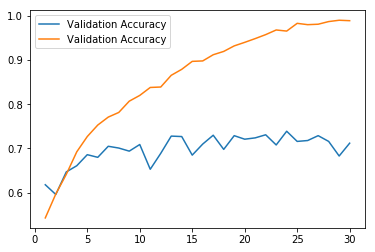

In [31]:
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.plot(epochs, acc, label = 'Validation Accuracy')
plt.legend()

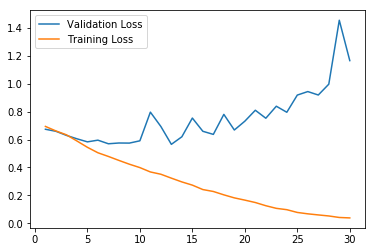

In [32]:
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.plot(epochs, loss, label = 'Training Loss')
plt.legend()

In [34]:
test_data_generator = ImageDataGenerator(rescale = 1.0/255)
test_data_gen = test_data_generator.flow_from_directory(test_set,
                                                        batch_size = 20,
                                                        target_size = (150,150),
                                                        class_mode = 'binary')

Found 1000 images belonging to 2 classes.


This basic model gave us an accuracy of **70%**.

## Data Augmentation  

Next, we use data augmentation to improve the result.

In [15]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Create a generator which randomly change the images slightly at each new epoch. This will help the CNN to generalize better.

In [16]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

Let's look at an example of how an image undergoes data aumentation.

In [17]:
from keras.preprocessing import image
fnames = [os.path.join(training_set_cats, file) for file in os.listdir(training_set_cats)]

In [30]:
img = image.load_img(fnames[15], target_size = (150,150))

In [31]:
x = image.img_to_array(img)
x.shape

(150, 150, 3)

In [32]:
x = x.reshape((1,)+ x.shape)

In [33]:
from matplotlib import pyplot as plt

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


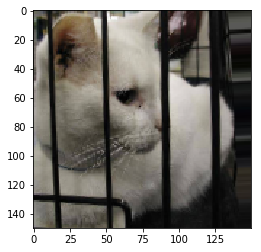

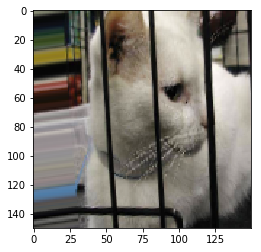

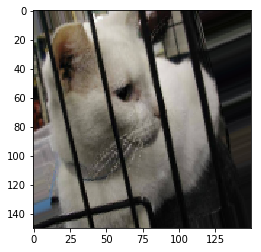

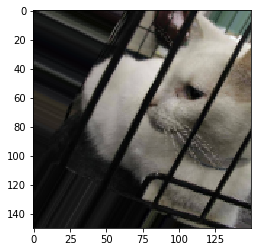

In [40]:
i = 0
for batch in datagen.flow(x, batch_size =1):
    print(batch.shape)
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break       

Use the same architecture to build the CNN

In [66]:
from keras.models import Sequential

In [67]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [68]:
model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(64, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation = 'relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(512, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [69]:
from keras import optimizers
model1.compile(optimizer = optimizers.RMSprop(lr =1e-4),
               loss = 'binary_crossentropy',
               metrics = ['acc'])

Prepare the training and validation generators

In [75]:
train_data_gen = ImageDataGenerator(rescale = 1.0/255,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    fill_mode = 'nearest')
                                    

In [71]:
validation_data_gen = ImageDataGenerator(rescale = 1.0/255)

In [76]:
train_generator = train_data_gen.flow_from_directory(training_set,
                                                    target_size = (150,150),
                                                    class_mode= "binary",
                                                    batch_size = 32)

Found 2000 images belonging to 2 classes.


In [73]:
validation_generator = validation_data_gen.flow_from_directory(validation_set,
                                                    target_size = (150,150),
                                                    class_mode= "binary",
                                                    batch_size = 32)

Found 1000 images belonging to 2 classes.


Train the model for 100 epochs

In [77]:
history1 = model1.fit_generator(train_generator,
                                epochs = 100,
                                steps_per_epoch = 100,
                                validation_data = validation_generator,
                                validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 90s 901ms/step - loss: 0.6920 - acc: 0.5328 - val_loss: 0.6869 - val_acc: 0.4962
Epoch 2/100
100/100 [==============================] - 87s 874ms/step - loss: 0.6816 - acc: 0.5484 - val_loss: 0.6669 - val_acc: 0.6022
Epoch 3/100
100/100 [==============================] - 87s 871ms/step - loss: 0.6747 - acc: 0.5644 - val_loss: 0.6551 - val_acc: 0.6212
Epoch 4/100
100/100 [==============================] - 88s 879ms/step - loss: 0.6641 - acc: 0.5919 - val_loss: 0.6368 - val_acc: 0.6212
Epoch 5/100
100/100 [==============================] - 89s 894ms/step - loss: 0.6396 - acc: 0.6341 - val_loss: 0.6776 - val_acc: 0.5704
Epoch 6/100
100/100 [==============================] - 87s 874ms/step - loss: 0.6271 - acc: 0.6350 - val_loss: 0.5859 - val_acc: 0.6802
Epoch 7/100
100/100 [==============================] - 87s 874ms/step - loss: 0.6121 - acc: 0.6619 - val_loss: 0.6294 - val_acc: 0.6345
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 88s 877ms/step - loss: 0.4408 - acc: 0.8022 - val_loss: 0.4476 - val_acc: 0.8071
Epoch 62/100
100/100 [==============================] - 88s 876ms/step - loss: 0.4350 - acc: 0.7956 - val_loss: 0.4613 - val_acc: 0.7824
Epoch 63/100
100/100 [==============================] - 87s 872ms/step - loss: 0.4332 - acc: 0.7947 - val_loss: 0.4466 - val_acc: 0.7989
Epoch 64/100
100/100 [==============================] - 88s 876ms/step - loss: 0.4245 - acc: 0.8059 - val_loss: 0.4943 - val_acc: 0.7881
Epoch 65/100
100/100 [==============================] - 87s 869ms/step - loss: 0.4507 - acc: 0.7894 - val_loss: 0.4608 - val_acc: 0.8071
Epoch 66/100
100/100 [==============================] - 88s 876ms/step - loss: 0.4294 - acc: 0.7978 - val_loss: 0.4476 - val_acc: 0.7893
Epoch 67/100
100/100 [==============================] - 88s 875ms/step - loss: 0.4311 - acc: 0.8044 - val_loss: 0.4829 - val_acc: 0.7754
Epoch 68/100
100/100 [===================

In [78]:
model1.save("cats_and_dogs_small_data_augmentation.h5")

Plot the loss and accuracy

In [79]:
import matplotlib.pyplot as plt

In [80]:
val_acc =history1.history['val_acc']
acc =history1.history['acc']
val_loss =history1.history['val_loss']
loss =history1.history['loss']
epochs = range(1, len(val_acc)+1)

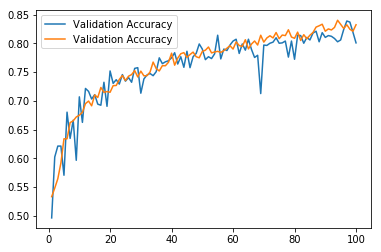

In [81]:
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.plot(epochs, acc, label = 'Validation Accuracy')
plt.legend()

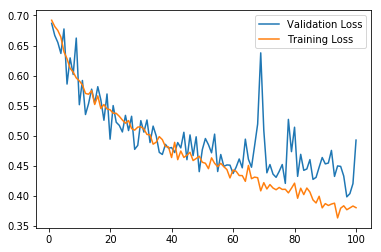

In [82]:
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.plot(epochs, loss, label = 'Training Loss')
plt.legend()

We get around **80%** accuracy, a 10% improvement over the first model.

Reference: Chapter 5, Deep Learning with Python, Francois Chollet